In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = '/content/drive/MyDrive/Artificial Intelligence/dataset/flowers'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image Augmentation untuk akurasi tinggi
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 20% data untuk validasi
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Size gambar standar 128x128 px, batch 32
img_size = (128, 128)
batch_size = 32

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)

val_generator = test_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
    seed=42
)

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dropout(0.5),  # prevent overfitting
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')  # 5 kelas bunga
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,306,181 (12.61 MB)

 Trainable params: 3,305,733 (12.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
# Early stopping mencegah overfitting dan save model terbaik
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model_flowers.h5', monitor='val_accuracy', save_best_only=True)

history = model.fit(
    train_generator,
    epochs=40,
    validation_data=val_generator,
    callbacks=[early_stop, checkpoint]
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.3892 - loss: 3.4143

109/109 ━━━━━━━━━━━━━━━━━━━━ 1073s 10s/step - accuracy: 0.3894 - loss: 3.4035 - val_accuracy: 0.2512 - val_loss: 5.3661
Epoch 2/40
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5017 - loss: 1.2322

109/109 ━━━━━━━━━━━━━━━━━━━━ 192s 2s/step - accuracy: 0.5018 - loss: 1.2321 - val_accuracy: 0.2640 - val_loss: 2.5656
Epoch 3/40
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5494 - loss: 1.1451

109/109 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.5495 - loss: 1.1451 - val_accuracy: 0.3570 - val_loss: 1.8973
Epoch 4/40
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5723 - loss: 1.1165

109/109 ━━━━━━━━━━━━━━━━━━━━ 192s 2s/step - accuracy: 0.5723 - loss: 1.1162 - val_accuracy: 0.4163 - val_loss: 2.2365
Epoch 5/40
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5978 - loss: 1.0488

109/109 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - accuracy: 0.5978 - loss: 1.0487 - val_accuracy: 0.5523 - val_loss: 1.1375
Epoch 6/40
109/109 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.6248 - loss: 0.9624 - val_accuracy: 0.5442 - val_loss: 1.2829
Epoch 7/40
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6430 - loss: 0.9127

109/109 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.6430 - loss: 0.9127 - val_accuracy: 0.6140 - val_loss: 1.0164
Epoch 8/40
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6547 - loss: 0.9209

109/109 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - accuracy: 0.6548 - loss: 0.9204 - val_accuracy: 0.7093 - val_loss: 0.8176
Epoch 9/40
109/109 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.6739 - loss: 0.8444 - val_accuracy: 0.5733 - val_loss: 1.0696
Epoch 10/40
109/109 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - accuracy: 0.6697 - loss: 0.8501 - val_accuracy: 0.5395 - val_loss: 1.1460
Epoch 11/40
109/109 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - accuracy: 0.6907 - loss: 0.8095 - val_accuracy: 0.6942 - val_loss: 0.8175
Epoch 12/40
109/109 ━━━━━━━━━━━━━━━━━━━━ 213s 2s/step - accuracy: 0.6870 - loss: 0.8120 - val_accuracy: 0.6488 - val_loss: 0.8987
Epoch 13/40
109/109 ━━━━━━━━━━━━━━━━━━━━ 194s 2s/step - accuracy: 0.7105 - loss: 0.7706 - val_accuracy: 0.6360 - val_loss: 1.0653
Epoch 14/40
109/109 ━━━━━━━━━━━━━━━━━━━━ 192s 2s/step - accuracy: 0.7215 - loss: 0.7430 - val_accuracy: 0.6977 - val_loss: 0.8482
Epoch 15/40
109/109 ━━━━━━━━━━━━━━━━━━━━ 204s 2s/step - accuracy: 0.7073 - loss: 0.7530 - val_accuracy:

109/109 ━━━━━━━━━━━━━━━━━━━━ 192s 2s/step - accuracy: 0.7454 - loss: 0.7049 - val_accuracy: 0.7279 - val_loss: 0.7545
Epoch 18/40
109/109 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.7341 - loss: 0.7181 - val_accuracy: 0.7093 - val_loss: 0.7782
Epoch 19/40
109/109 ━━━━━━━━━━━━━━━━━━━━ 204s 2s/step - accuracy: 0.7372 - loss: 0.7015 - val_accuracy: 0.6919 - val_loss: 0.8984
Epoch 20/40
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7448 - loss: 0.6845

109/109 ━━━━━━━━━━━━━━━━━━━━ 194s 2s/step - accuracy: 0.7448 - loss: 0.6846 - val_accuracy: 0.7488 - val_loss: 0.6670
Epoch 21/40
109/109 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.7414 - loss: 0.6883 - val_accuracy: 0.6698 - val_loss: 0.8706
Epoch 22/40
109/109 ━━━━━━━━━━━━━━━━━━━━ 205s 2s/step - accuracy: 0.7556 - loss: 0.6509 - val_accuracy: 0.7151 - val_loss: 0.8091
Epoch 23/40
109/109 ━━━━━━━━━━━━━━━━━━━━ 194s 2s/step - accuracy: 0.7518 - loss: 0.6468 - val_accuracy: 0.6721 - val_loss: 0.9248
Epoch 24/40
109/109 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.7424 - loss: 0.6610 - val_accuracy: 0.7372 - val_loss: 0.7519
Epoch 25/40
109/109 ━━━━━━━━━━━━━━━━━━━━ 194s 2s/step - accuracy: 0.7592 - loss: 0.6225 - val_accuracy: 0.7151 - val_loss: 0.8357
Epoch 26/40
109/109 ━━━━━━━━━━━━━━━━━━━━ 192s 2s/step - accuracy: 0.7608 - loss: 0.6323 - val_accuracy: 0.6826 - val_loss: 0.7763
Epoch 27/40
109/109 ━━━━━━━━━━━━━━━━━━━━ 208s 2s/step - accuracy: 0.7608 - loss: 0.6318 - val_accuracy

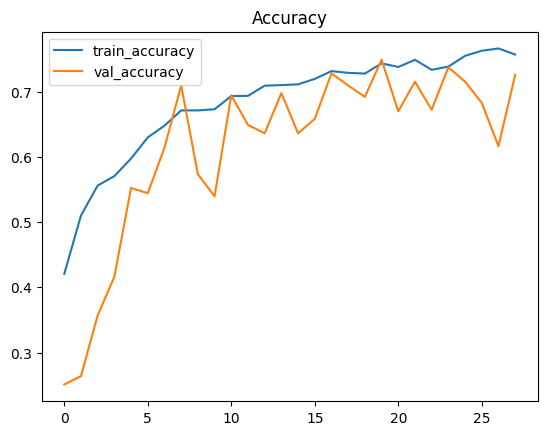

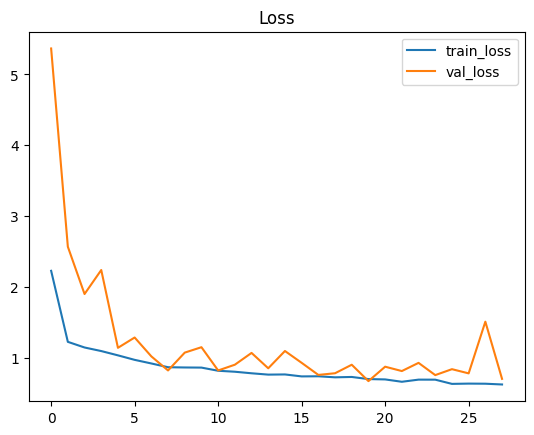

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Loss')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step


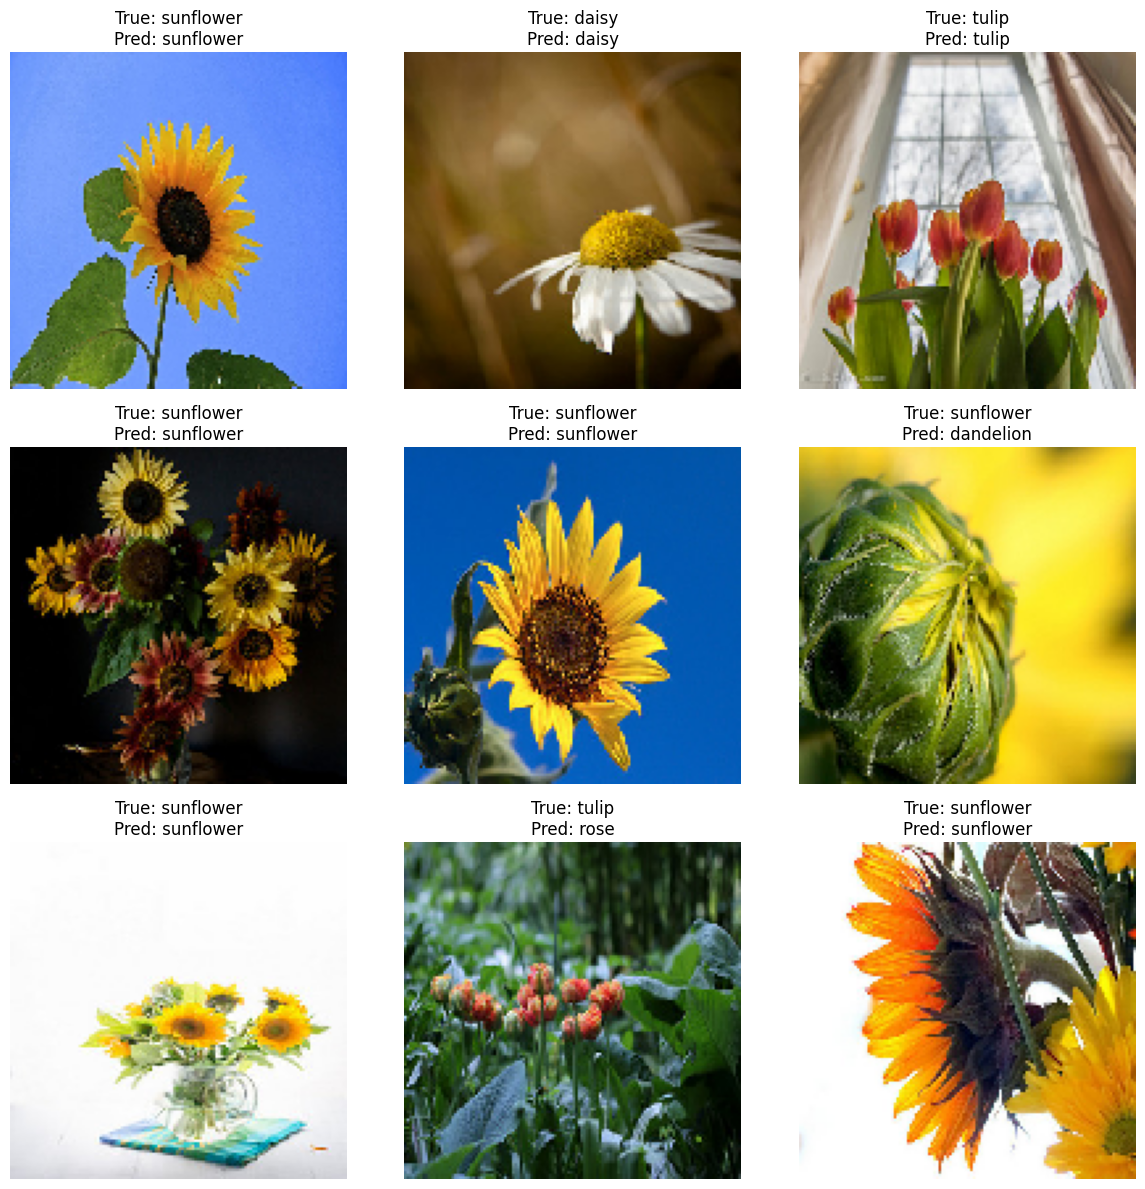

In [13]:
import numpy as np

images, labels = next(val_generator)  # satu batch
preds = model.predict(images)
pred_labels = np.argmax(preds, axis=1)
true_labels = np.argmax(labels, axis=1)

class_names = list(val_generator.class_indices.keys())

plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3,3, i+1)
    plt.imshow(images[i])
    plt.title(f"True: {class_names[true_labels[i]]}\nPred: {class_names[pred_labels[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [14]:
  from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Dapatkan prediksi di seluruh validation dataset
val_steps = val_generator.samples // val_generator.batch_size
preds = model.predict(val_generator, steps=val_steps+1)
y_pred = np.argmax(preds, axis=1)
y_true = val_generator.classes[:len(y_pred)]

print(classification_report(y_true, y_pred, target_names=class_names))
print(confusion_matrix(y_true, y_pred))

27/27 ━━━━━━━━━━━━━━━━━━━━ 22s 728ms/step
              precision    recall  f1-score   support

       daisy       0.15      0.16      0.16       152
   dandelion       0.28      0.25      0.26       210
        rose       0.16      0.17      0.17       156
   sunflower       0.16      0.21      0.18       146
       tulip       0.19      0.14      0.16       196

    accuracy                           0.19       860
   macro avg       0.19      0.19      0.19       860
weighted avg       0.19      0.19      0.19       860

[[24 39 24 41 24]
 [34 53 48 43 32]
 [26 35 27 31 37]
 [26 29 36 31 24]
 [47 36 35 50 28]]


In [16]:
from tensorflow.keras.preprocessing import image

img_path = '/content/drive/MyDrive/Artificial Intelligence/dataset/flowers/daisy/506348009_9ecff8b6ef.jpg'
img = image.load_img(img_path, target_size=img_size)
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
pred_class = class_names[np.argmax(pred)]

print("Predicted class:", pred_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step
Predicted class: daisy


In [18]:
from tensorflow.keras.models import load_model

# Simpan model (sudah otomatis di ModelCheckpoint 'best_model_flowers.h5')
# Untuk load kembali:
model = load_model('best_model_flowers.h5')